In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import re
from secrets import secrets

In [2]:
api_key = secrets.get('YT_API_KEY')
channel_id = 'UCeVMnSShP_Iviwkknt83cww'  # CodeWithHarry
playlist_id = 'PLu0W_9lII9agqZuv_XJen_BEHycIh-FmG'  # Python Practice Programs with Logics & Explanations

youtube = build('youtube', 'v3', developerKey = api_key)

## Function to get Video IDs

In [3]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list( part = 'contentDetails', playlistId = playlist_id, maxResults = 50 )
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_id = response['items'][i]['contentDetails']['videoId']
        video_ids.append(video_id)
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        
        if next_page_token is None:
            more_pages = False
        
        else:
            request = youtube.playlistItems().list( part = 'contentDetails', playlistId = playlist_id, maxResults = 50, pageToken = next_page_token )
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_id = response['items'][i]['contentDetails']['videoId']
                video_ids.append(video_id)
            
            next_page_token = response.get('nextPageToken')

    return video_ids
#     return response


In [4]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

['3zBhmYSLB70',
 'DyyGCukZxXI',
 'IRoM4o0LZjg',
 'u8pBzVIdF2A',
 'wwJmoowLVfA',
 'HHddgUtliBg',
 '5LoT-BmdKEo',
 'gW-qFwQJrUs',
 'LGdEpC4qswA',
 'r2c5iiHNRq4',
 '2_eAvw_rOKA',
 'Jzv3G5iDLvw',
 'Vw-XaLNU2hw',
 'PyNV7I9S4IY',
 '6kYUo2FSBFo',
 'hSTZ4Pi51lI',
 'DePWIOK1STg',
 '__-o894zIcY',
 'GxWwBp8SNNA']

## Function to fetch Video Details

In [5]:
def get_video_details(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list( part ='snippet,statistics,contentDetails', id = ','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for i in range(len(response['items'])):
            vid_id = response['items'][i]['id']
            video_stats = dict( 
                                Title = response['items'][i]['snippet']['title'],
                                Published_date = response['items'][i]['snippet']['publishedAt'],
                                Views = response['items'][i]['statistics']['viewCount'],
                                Likes = response['items'][i]['statistics']['likeCount'],
                                Comments = response['items'][i]['statistics']['commentCount'],
                                Duration = response['items'][i]['contentDetails']['duration'],
                                yt_link = f'https://www.youtube.com/watch?v={vid_id}'
                              )
            all_video_stats.append(video_stats)
    
    return all_video_stats
#     return response

In [6]:
video_details = get_video_details(youtube, video_ids)
video_details

[{'Title': 'How to Create An Indian Kirana Store Calculator & Receipt Generator In Basic Python?',
  'Published_date': '2019-02-24T12:15:00Z',
  'Views': '153596',
  'Likes': '5446',
  'Comments': '892',
  'Duration': 'PT13M12S',
  'yt_link': 'https://www.youtube.com/watch?v=3zBhmYSLB70'},
 {'Title': 'How To Find Factorial & No Of Trailing Zeros In A Factorial Of A Number In Python?',
  'Published_date': '2019-02-25T12:15:01Z',
  'Views': '31919',
  'Likes': '1277',
  'Comments': '236',
  'Duration': 'PT19M7S',
  'yt_link': 'https://www.youtube.com/watch?v=DyyGCukZxXI'},
 {'Title': 'How To Create A Currency Converter In Python? | Python Programming Practice (Hindi)',
  'Published_date': '2019-02-27T03:53:23Z',
  'Views': '42752',
  'Likes': '1184',
  'Comments': '114',
  'Duration': 'PT13M21S',
  'yt_link': 'https://www.youtube.com/watch?v=IRoM4o0LZjg'},
 {'Title': 'How To Create A Python HTTP Server For Web Development?',
  'Published_date': '2019-02-26T12:15:01Z',
  'Views': '40324',

In [7]:
videos_data = pd.DataFrame(video_details)
videos_data

,Title,Published_date,Views,Likes,Comments,Duration,yt_link
0,How to Create An Indian Kirana Store Calculato...,2019-02-24T12:15:00Z,153596,5446,892,PT13M12S,https://www.youtube.com/watch?v=3zBhmYSLB70
1,How To Find Factorial & No Of Trailing Zeros I...,2019-02-25T12:15:01Z,31919,1277,236,PT19M7S,https://www.youtube.com/watch?v=DyyGCukZxXI
2,How To Create A Currency Converter In Python? ...,2019-02-27T03:53:23Z,42752,1184,114,PT13M21S,https://www.youtube.com/watch?v=IRoM4o0LZjg
3,How To Create A Python HTTP Server For Web Dev...,2019-02-26T12:15:01Z,40324,1226,80,PT9M48S,https://www.youtube.com/watch?v=u8pBzVIdF2A
4,I Created an Automatic Folder Cleaner in Python,2020-05-02T05:26:01Z,32345,1508,295,PT25M28S,https://www.youtube.com/watch?v=wwJmoowLVfA
5,I Created a Drink Water Notification Reminder ...,2020-05-10T16:08:29Z,118563,4667,498,PT13M48S,https://www.youtube.com/watch?v=HHddgUtliBg
6,I Created a Password Generator using Python,2020-05-11T14:33:28Z,59264,2568,385,PT22M41S,https://www.youtube.com/watch?v=5LoT-BmdKEo
7,I Created an Automatic Birthday Wisher To Auto...,2020-05-17T13:49:56Z,76167,3717,805,PT1H17S,https://www.youtube.com/watch?v=gW-qFwQJrUs
8,How I Secure My Passwords Using Python,2020-05-24T16:43:24Z,26082,1138,250,PT18M49S,https://www.youtube.com/watch?v=LGdEpC4qswA
9,I Created a Binod Detector In Python 🔥🔥,2020-08-08T15:55:06Z,78416,5299,5029,PT13M37S,https://www.youtube.com/watch?v=r2c5iiHNRq4


In [8]:
videos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           19 non-null     object
 1   Published_date  19 non-null     object
 2   Views           19 non-null     object
 3   Likes           19 non-null     object
 4   Comments        19 non-null     object
 5   Duration        19 non-null     object
 6   yt_link         19 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [9]:
videos_data['Published_date'] = pd.to_datetime(videos_data['Published_date']).dt.date
videos_data['Views'] = pd.to_numeric(videos_data['Views'])
videos_data['Likes'] = pd.to_numeric(videos_data['Likes'])
videos_data['Comments'] = pd.to_numeric(videos_data['Comments'])
videos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           19 non-null     object
 1   Published_date  19 non-null     object
 2   Views           19 non-null     int64 
 3   Likes           19 non-null     int64 
 4   Comments        19 non-null     int64 
 5   Duration        19 non-null     object
 6   yt_link         19 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.2+ KB


In [10]:
most_popular_videos = videos_data.sort_values('Views', ascending = False).head(5)
most_popular_videos

,Title,Published_date,Views,Likes,Comments,Duration,yt_link
0,How to Create An Indian Kirana Store Calculato...,2019-02-24,153596,5446,892,PT13M12S,https://www.youtube.com/watch?v=3zBhmYSLB70
5,I Created a Drink Water Notification Reminder ...,2020-05-10,118563,4667,498,PT13M48S,https://www.youtube.com/watch?v=HHddgUtliBg
11,Creating a Rest API Using Flask and Jsonify in...,2020-08-17,87874,2606,355,PT20M27S,https://www.youtube.com/watch?v=Jzv3G5iDLvw
9,I Created a Binod Detector In Python 🔥🔥,2020-08-08,78416,5299,5029,PT13M37S,https://www.youtube.com/watch?v=r2c5iiHNRq4
7,I Created an Automatic Birthday Wisher To Auto...,2020-05-17,76167,3717,805,PT1H17S,https://www.youtube.com/watch?v=gW-qFwQJrUs


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


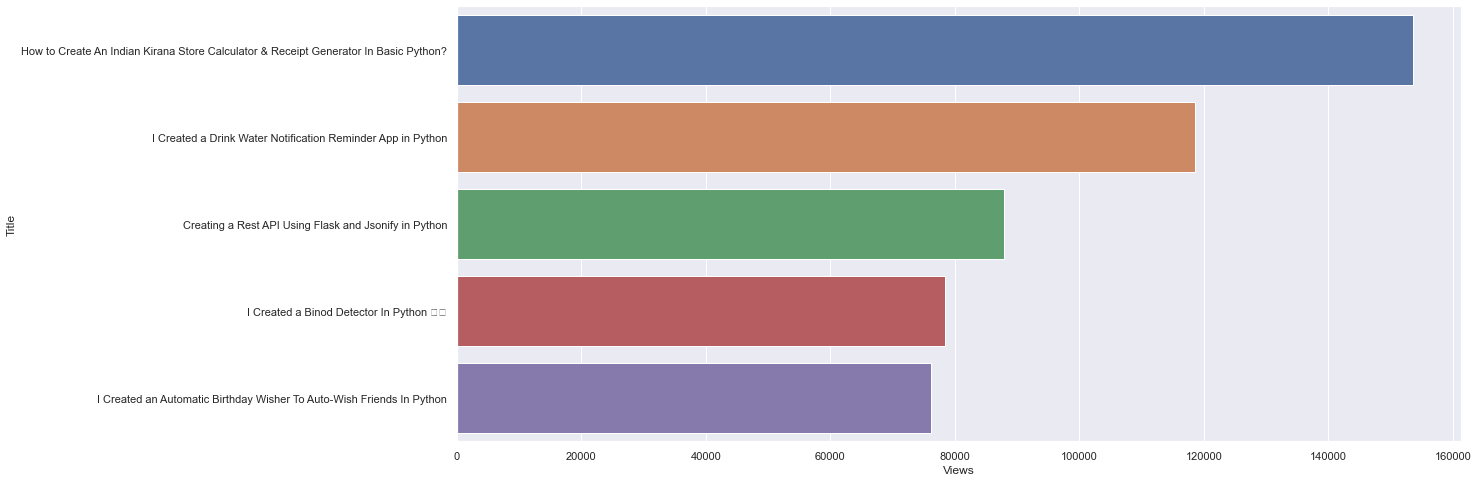

In [11]:
sns.set( rc = { 'figure.figsize' : (18,8) } )
vid_comp = sns.barplot(x = 'Views', y = 'Title', data = most_popular_videos)